In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
import clamped_beam as cbe


import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers.core import Dense
from keras.optimizers import Adam

from random import randint
import tensorflow as tf

configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=configuration)

FEM: end displacement is 62.5 mm, rotation 5.371 deg
MBD: end displacement is 61.972 mm, rotation 5.335 deg
1001
done simulating!
               0             1             2    3             4   \
0    0.000000e+00  0.000000e+00  0.000000e+00  1.0  0.000000e+00   
1    0.000000e+00  0.000000e+00 -6.656024e-27  1.0  2.587248e-47   
2    0.000000e+00  0.000000e+00  8.966871e-27  1.0 -6.733023e-42   
3    0.000000e+00  0.000000e+00  4.995394e-25  1.0 -2.417151e-42   
4    0.000000e+00  0.000000e+00  1.621384e-24  1.0 -8.888855e-42   
..            ...           ...           ...  ...           ...   
995 -1.492389e-25  7.245822e-23  1.546946e-09  1.0 -3.652837e-18   
996 -1.474686e-25  7.260300e-23  1.554169e-09  1.0 -3.630147e-18   
997 -1.456982e-25  7.274778e-23  1.560841e-09  1.0 -3.601180e-18   
998 -1.439278e-25  7.289256e-23  1.567008e-09  1.0 -3.561434e-18   
999 -1.421574e-25  7.303734e-23  1.572715e-09  1.0 -3.506406e-18   

               5             6         7             

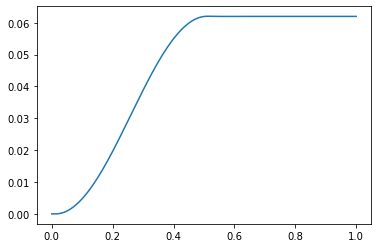

In [2]:
### Creating dataset from data points ###

n_elem = 40
l = 1
h = 0.02
E = 2e11
nu = 0.3
rho = 7801
Fy = 500.0


vals = cbe.generate(n_elem, l, h, E, nu, rho, Fy) ## Generating the training data with separate module #
#vals2 = cbe.generate(n_elem, l, h, E, nu, rho, Fy=700) ## Generating the secound set of data       #
print ("done simulating!")



dframe = pd.DataFrame() ##Creating Pandas DF from data ##

for i in range(len(vals[0])):
       dframe[i] = pd.DataFrame(vals[0][i])
        
dframe[50] = pd.DataFrame(vals[1])
#print (dframe)

# ### Suffle and split data to val and train data ###
# dframe_train, validate = \
#               np.split(dframe.sample(frac=1, random_state=42), 
#                        [int(.9*len(dframe))])


# Y = dframe_train.[:-1]
# X = dframe_train

X = dframe.drop(0)
Y = dframe.drop(dframe.shape[0]-1)

print (Y)
print (X)


# x_val = validate 
# y_val = x_val[50] ## Select matching val data for y_val ##
# validation_data=(x_val, y_val)

In [3]:
### CUSTOM LOSS FUNCTION ###

### using keras as backed for loss function ###

def custom_loss(y_true, y_pred):
    
    loss = K.square(y_pred - y_true) 
    loss = loss * 0.4
    
    
    return loss

In [4]:
### CREATING NN MODEL ###

model=Sequential([Dense(51,input_shape=(51,), activation="softplus"),
                  Dense(60,activation="softplus"),
                  Dense(80,activation="softplus"),
                  Dense(60,activation="softplus"),  
                  Dense(51)])

model.compile(Adam(lr=0.001),loss=custom_loss)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
###TRAINING OF MODEL ###

history = model.fit(X, Y, epochs=10, validation_split = 0.1)

##callbacks= [keras.callbacks.EarlyStopping(patience=5)],

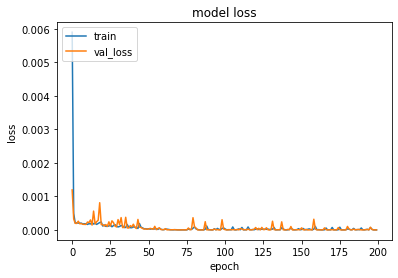

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc='upper left')
plt.show()

FEM: end displacement is 68.75 mm, rotation 5.909 deg
MBD: end displacement is 68.05 mm, rotation 5.86 deg
1001
       0             1             2    3             4             5   \
0     0.0  0.000000e+00  0.000000e+00  1.0  0.000000e+00  0.000000e+00   
1     0.0  0.000000e+00 -8.819793e-27  1.0  6.679600e-45 -1.159739e-28   
2     0.0  0.000000e+00 -8.707829e-25  1.0  8.297699e-42  8.397711e-27   
3     0.0  0.000000e+00  1.332720e-24  1.0 -3.133576e-42 -2.669398e-26   
4     0.0  0.000000e+00  5.663199e-24  1.0 -2.019376e-41 -1.071484e-25   
...   ...           ...           ...  ...           ...           ...   
996   0.0  1.885731e-24  6.004801e-10  1.0  1.102348e-17  2.201904e-11   
997   0.0  1.885731e-24  4.987441e-10  1.0  1.140942e-17  2.458164e-11   
998   0.0  1.885731e-24  4.019713e-10  1.0  1.181480e-17  2.699559e-11   
999   0.0  1.885731e-24  3.114922e-10  1.0  1.226136e-17  2.922335e-11   
1000  0.0  1.885731e-24  2.286372e-10  1.0  1.277089e-17  3.122741e-11   


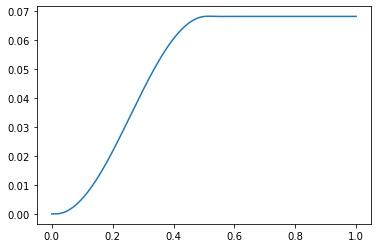

In [7]:
### Creating testing data ###
n_elem = 40
l = 1
h = 0.02
E = 2e11
nu = 0.3
rho = 7801
Fy = 600.0

testvals = cbe.generate(n_elem, l, h, E, nu, rho, Fy=550) ## Generating testing data##
dframe2 = pd.DataFrame() ##Creating Pandas DF from data ##

for i in range(len(testvals[0])):
       dframe2[i] = pd.DataFrame(testvals[0][i])
        
dframe2[50] = pd.DataFrame(testvals[1])





timeframe = pd.DataFrame(range(len(testvals[1]+1)), columns=["Time"]) ## For plotting resutlts


print(dframe2)

Y2 = dframe2[50]
X2 = dframe2

print (Y2)

900/900 [==============================] - 0s 69us/step
3.9613699654081657e-07


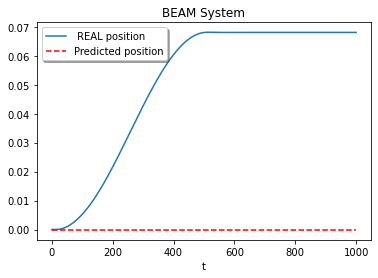

In [8]:
#### Test ####

results = model.evaluate(X, Y)
print(results)

y_pred = [] ## List for predictions
for row in X2.itertuples(): ## Iterates trough test set getting predictions

    xr = model.predict(np.array(X2))
    y_pred.append(float(xr[0]))
 

plt.plot(timeframe, Y2)
plt.plot(timeframe, y_pred, linestyle='dashed', color='red')

plt.xlabel('t')
plt.legend([' REAL position',  'Predicted position'], shadow=True)
plt.title('BEAM System')
plt.show()

In [ ]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)